In [1]:
cd drive/MyDrive/9sem/aprendizaje\ maquina/lab8_adaboost


/content/drive/MyDrive/9sem/aprendizaje maquina/lab8_adaboost


In [2]:
!ls

lab8_adaboost.ipynb  mat.xlsx


In [105]:
import pandas as pd
import numpy as np
df_data=pd.read_excel(open('mat.xlsx', 'rb'),
              sheet_name='datos')
X=df_data[['x','y']].to_numpy()
y=df_data['target'].to_numpy()

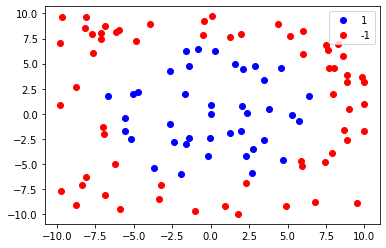

In [6]:
import matplotlib.pyplot as plt


plt.plot(df_data[df_data['target']==1]['x'],df_data[df_data['target']==1]['y'] ,'bo',label="1")
plt.plot(df_data[df_data['target']==-1]['x'],df_data[df_data['target']==-1]['y'] ,'ro',label="-1")
plt.legend()
plt.show()

In [141]:
import matplotlib.pyplot as plt
import numpy as np
class ThresholdDecision:
  def __init__(self):
    self.threshold_feature = None
    self.threshold_value = None
    self.X=None
    self.y=None
    self.w=None
    self.polarity = 1
    self.alpha = None
  def predict(self,X):
    
    n_samples = X.shape[0]
    column = X[:, self.threshold_feature]
    predictions = np.ones(n_samples)
    if self.polarity == 1:
      predictions[column <= self.threshold_value] = -1
    else:
      predictions[column > self.threshold_value] = -1

    if self.threshold_feature==1:
      print("alpha: ","{0:.3f}".format(self.alpha)," threshold y: ","{0:.3f}".format(self.threshold_value))
    else:
      print("alpha: ","{0:.3f}".format(self.alpha)," threshold x: ","{0:.3f}".format(self.threshold_value))

    return predictions

  def graph(self):
    fig, ax = plt.subplots()
    for i in range(self.X.shape[0]):
      if self.y[i]==1:
        ax.plot(self.X[i,0],self.X[i,1],'bo',markersize=self.w[i]*500)
      else:
        ax.plot(self.X[i,0],self.X[i,1],'ro',markersize=self.w[i]*500)
   
      
    # for i in range(self.w.shape[0]):
    #   ax.annotate("{0:.3f}".format(self.w[i]), (self.X[i,0], self.X[i,1]))
    if self.threshold_feature==1:
      if self.polarity==-1:
        ax.axvspan(X.min(), X.max(), ymin=(self.threshold_value-X.min())/ (X.max()-X.min()), ymax=1, alpha=0.5, color='red')
        ax.axvspan(X.min(), X.max(), ymin=0, ymax=(self.threshold_value-X.min())/ (X.max()-X.min()), alpha=0.5, color='blue')
      else:
        ax.axvspan(X.min(), X.max(), ymin=0, ymax=(self.threshold_value-X.min())/ (X.max()-X.min()), alpha=0.5, color='red')
        ax.axvspan(X.min(), X.max(), ymin=(self.threshold_value-X.min())/ (X.max()-X.min()), ymax=1, alpha=0.5, color='blue')
    else:
        if self.polarity==-1:
          ax.axvspan(self.threshold_value, X.max(), ymin=0, ymax=1, alpha=0.5, color='red')
          ax.axvspan(X.min(),self.threshold_value, ymin=0, ymax=1, alpha=0.5, color='blue')
        else:
          ax.axvspan(X.min(), self.threshold_value, ymin=0, ymax=1, alpha=0.5, color='red')
          ax.axvspan(self.threshold_value, X.max(), ymin=0, ymax=1, alpha=0.5, color='blue')
  
  def train(self,X,y,w):
    self.X=X
    self.y=y
    self.w=w
    #print(w)
    samples_number, features_number = X.shape
    self.min_error = float('inf')
    for feature in range(features_number):
      #current feature
      column = X[:, feature]
      #all possible Treashouls
      thresholds = np.unique(column)
      
      for threshold in np.linspace(X.min(),X.max(),1000):
        p = 1
        # print(threshold)
        predictions = np.ones(samples_number)
        #if column is less than threshold
        predictions[column <= threshold] = -1
        #sum of weigths of bad predictions
        error=sum(w[y != predictions])
        #print(threshold,error)
        if error > 0.5:
          error = 1 - error
          predictions=predictions*(-1)
          p = -1
        
        if error <= self.min_error:
          self.polarity = p
          self.threshold_value = threshold
          self.threshold_feature = feature
          self.min_error = error
          self.predictions=predictions
    #print(self.polarity)
    #print(self.threshold_value)
  

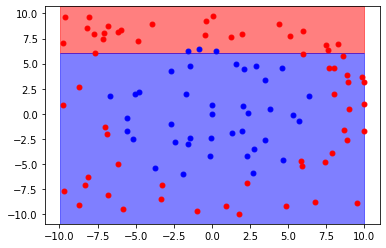

In [142]:
T=ThresholdDecision()
samples_number, features_number = X.shape
w = np.full(samples_number, (1 / samples_number))
T.train(X,y,w)
T.graph()


In [166]:
class AdaBoost:
  def __init__(self):
    self.X=None
    
  def graph(self):
    fig, ax = plt.subplots()
    for classifier in self.classifiers:
      x=np.linspace(self.X.min(),self.X.max(),1000)
      y=np.full(1000, classifier.threshold_value)
      if classifier.threshold_feature==1:
        ax.plot(x,y)
      else:
        ax.plot(y,x)

    for i in range(self.X.shape[0]):
      if self.predict[i]==1:
        ax.plot(self.X[i,0],self.X[i,1],'bo')
      else:
        ax.plot(self.X[i,0],self.X[i,1],'ro')
  

  def train(self,X,y,n_classifiers):
    self.X=X
    self.y=y
    self.classifiers=[]
    #initializate weights
    samples_number, features_number = X.shape
    w = np.full(samples_number, (1 / samples_number))
    for i in range(n_classifiers):
      classifier=ThresholdDecision()
      classifier.train(X,y,w)
      
      classifier.graph()

      epsilon=classifier.min_error/sum(w)

      alpha=np.log((1-epsilon)/epsilon)
      classifier.alpha =alpha
      #update weights
      w *= np.exp((-1/2)*y*alpha*classifier.predictions)
      w /=sum(w)
      #save classifier
      self.classifiers.append(classifier)
  
  def predict(self, X):
      predicts = [classifiers.alpha * classifiers.predict(X) for classifiers in self.classifiers]       
      predict = np.sum(predicts, axis=0)
      predict = np.sign(predict)
      self.predict=predict
      return predict

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


alpha:  0.480  threshold y:  5.736
alpha:  0.699  threshold y:  9.992
alpha:  0.831  threshold x:  5.835
alpha:  0.589  threshold x:  -5.595
alpha:  0.880  threshold x:  -9.812
alpha:  0.733  threshold y:  -5.995
alpha:  0.532  threshold x:  -9.812
alpha:  0.791  threshold y:  6.815
alpha:  0.561  threshold x:  -9.812
alpha:  0.756  threshold x:  5.835
alpha:  0.482  threshold x:  -2.678
alpha:  0.631  threshold y:  9.992
alpha:  0.660  threshold y:  -4.636
alpha:  0.525  threshold y:  2.698
alpha:  0.534  threshold x:  -9.812
alpha:  0.633  threshold x:  6.755
alpha:  0.478  threshold y:  9.992
alpha:  0.654  threshold x:  -5.595
alpha:  0.421  threshold x:  -9.812
alpha:  0.648  threshold y:  -5.995
alpha:  0.486  threshold x:  -9.812
alpha:  0.711  threshold y:  6.815
alpha:  0.520  threshold y:  9.992
alpha:  0.695  threshold x:  4.876
alpha:  0.392  threshold y:  -0.999
alpha:  0.423  threshold y:  9.992
alpha:  0.600  threshold y:  6.815
alpha:  0.459  threshold x:  -9.812
alpha:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


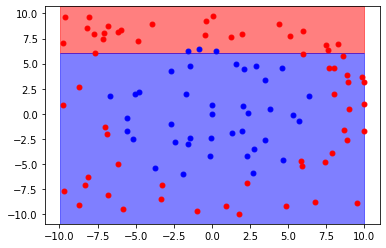

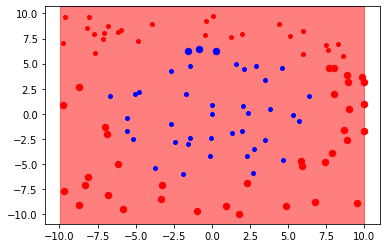

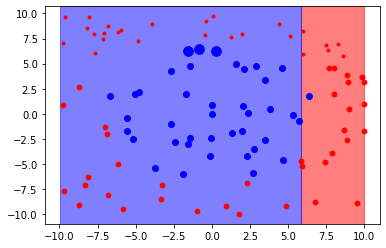

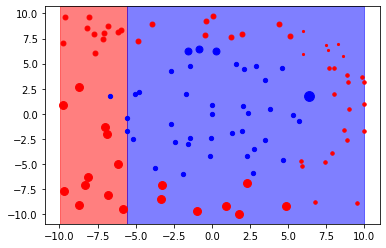

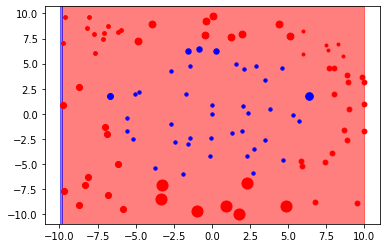

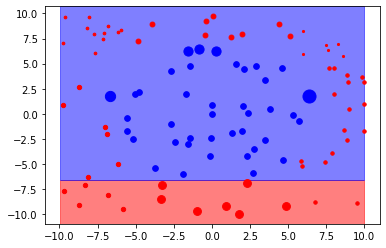

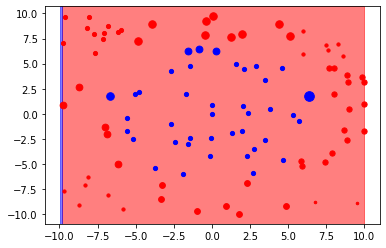

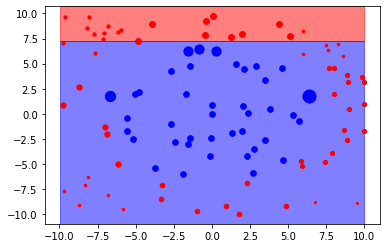

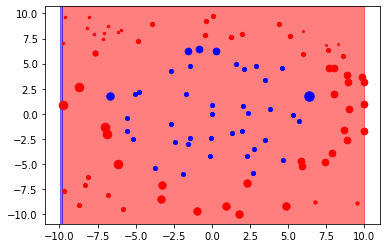

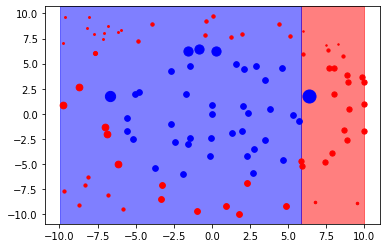

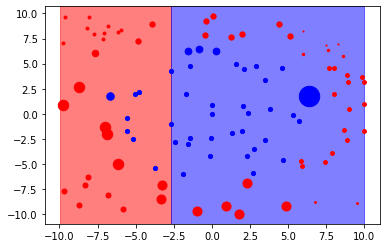

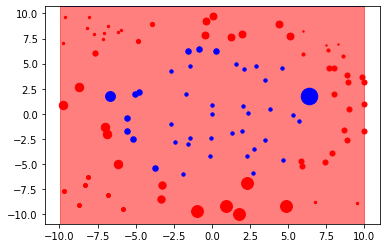

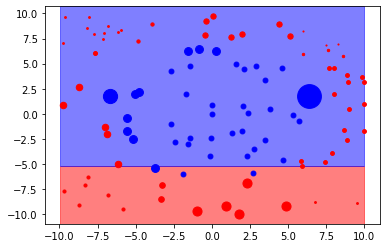

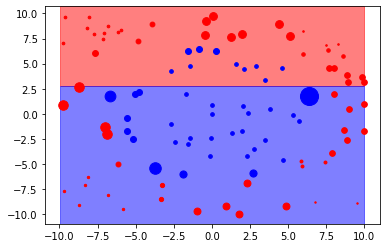

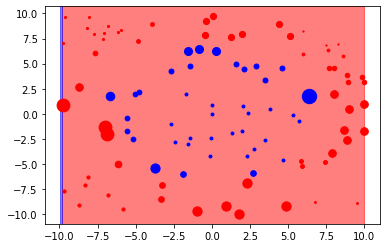

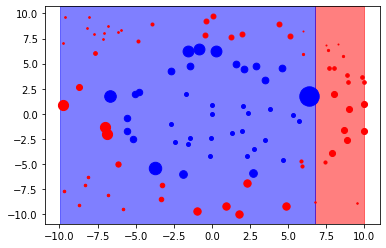

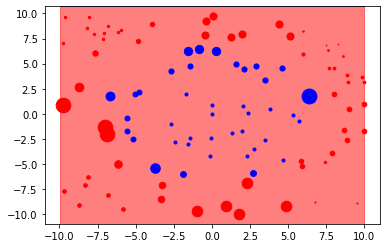

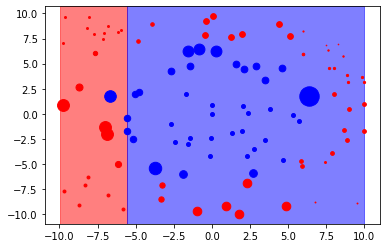

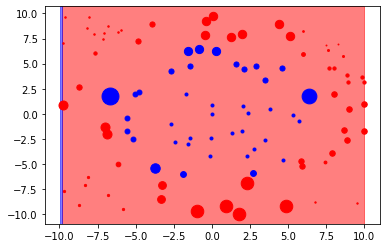

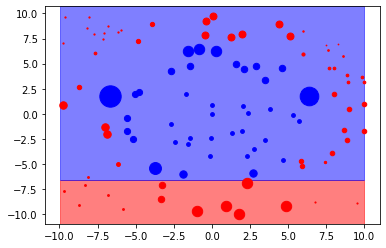

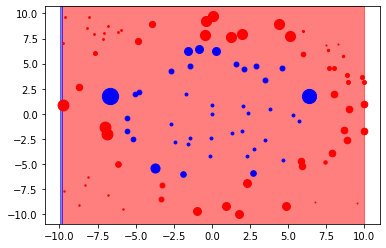

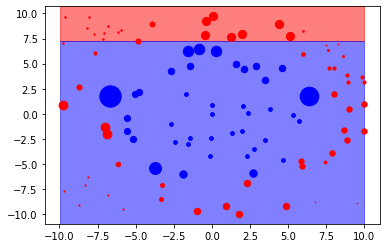

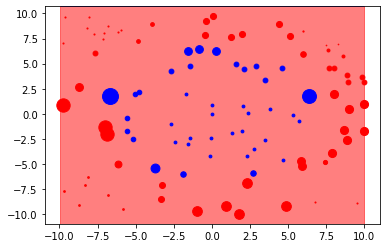

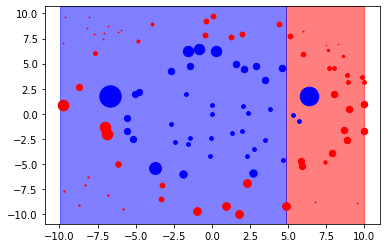

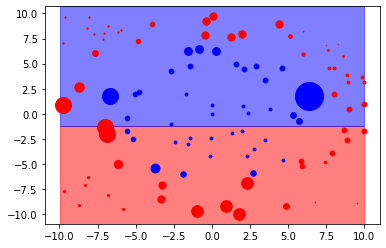

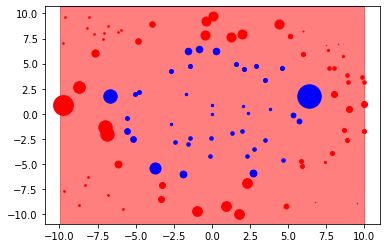

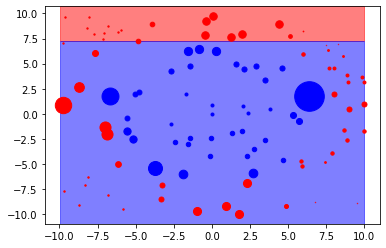

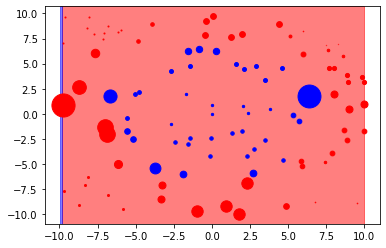

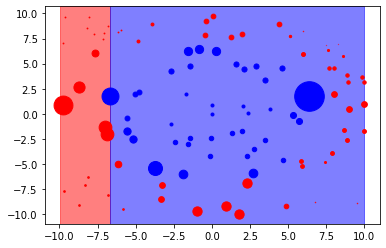

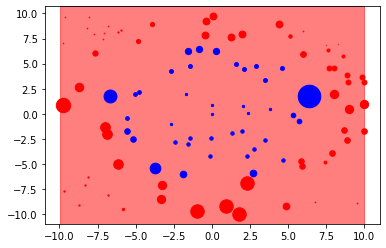

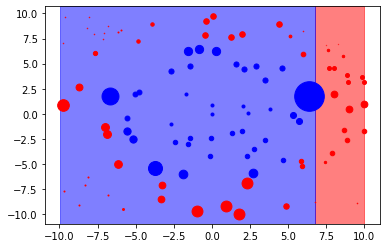

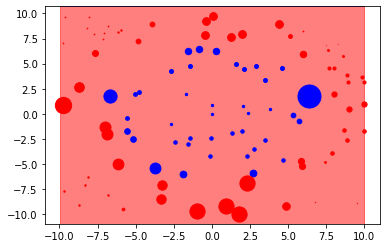

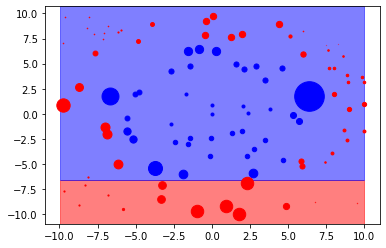

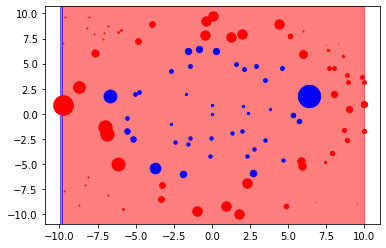

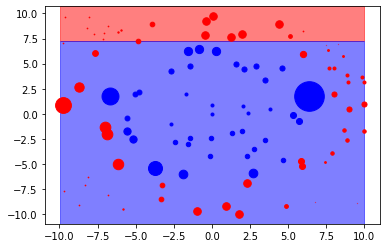

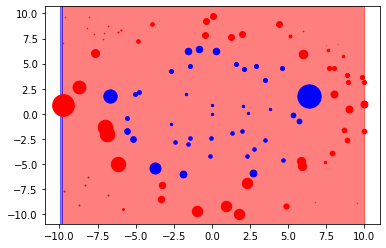

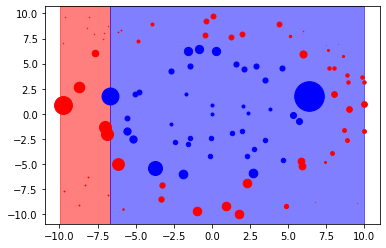

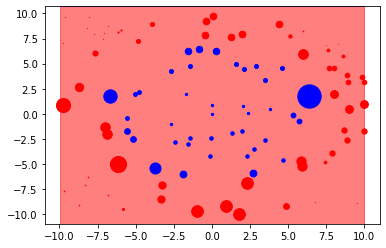

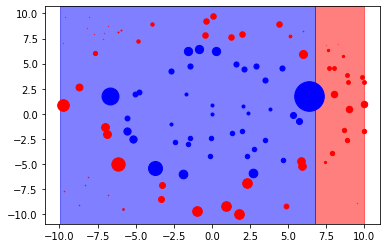

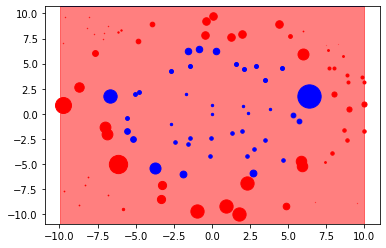

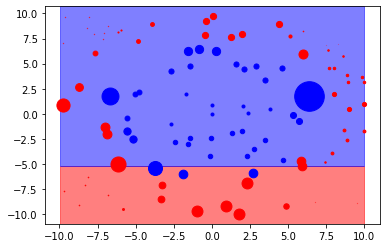

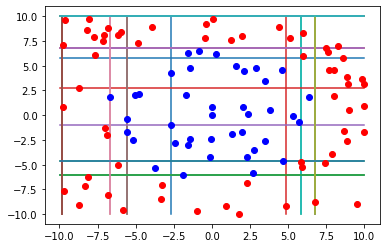

In [167]:
ada=AdaBoost()
ada.train(X,y,41)
ada.predict(X)
ada.graph()

In [ ]:
.1*100